# Straight line Hough transform

Straight lines can be detected using the Hough transform.

Polar coordinates are used for this method because a vertical line would have slope of infinity.
Therefore, a line is described as a length $r$ and angle with the $x$-axis, $\theta$.

The Hough transform works by searching for combinations of the two parameters $r$ and $\theta$ and tracking the frequency of the occurrence of each pair in the image.
This builds an $M \times N$ matrix with dimensions corresponding to the number of values for $r$ and $\theta$ that will be searched.
The top pairs of parameters are provided as the result to indicate the most likely lines in the image.

In [1]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format='retina'

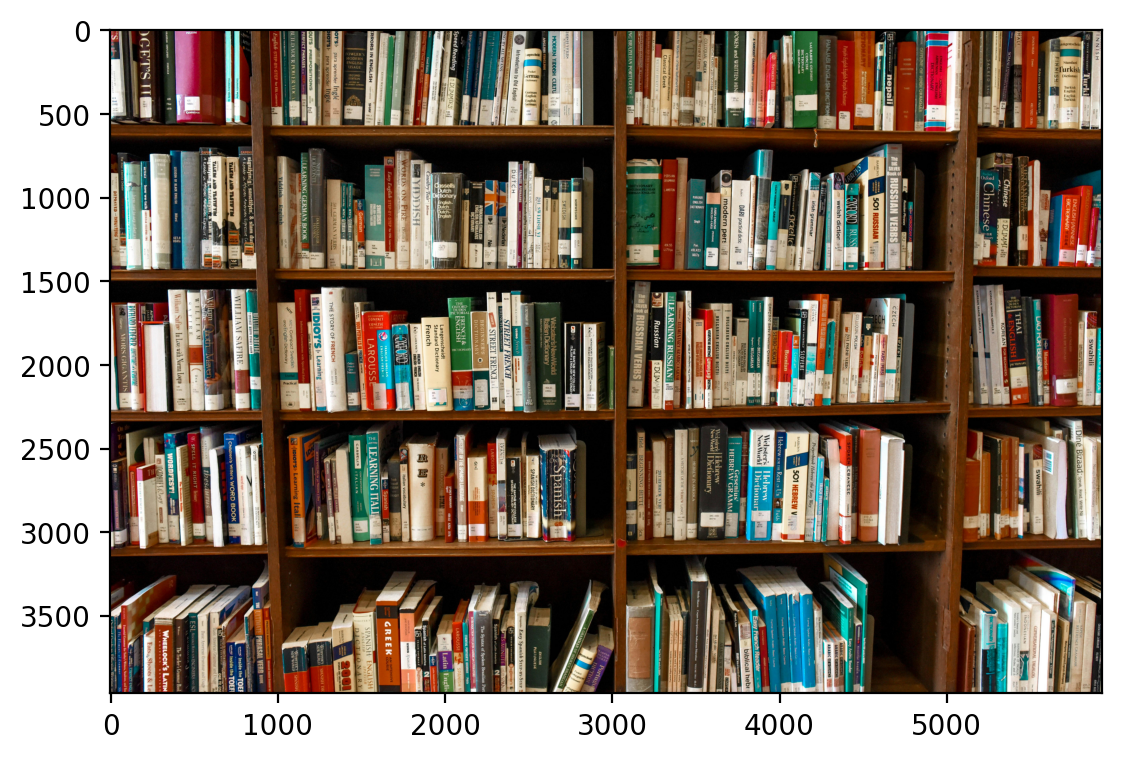

In [3]:
bookshelf = ski.io.imread("../images/bookshelf1.jpg")
plt.imshow(bookshelf)
plt.show()

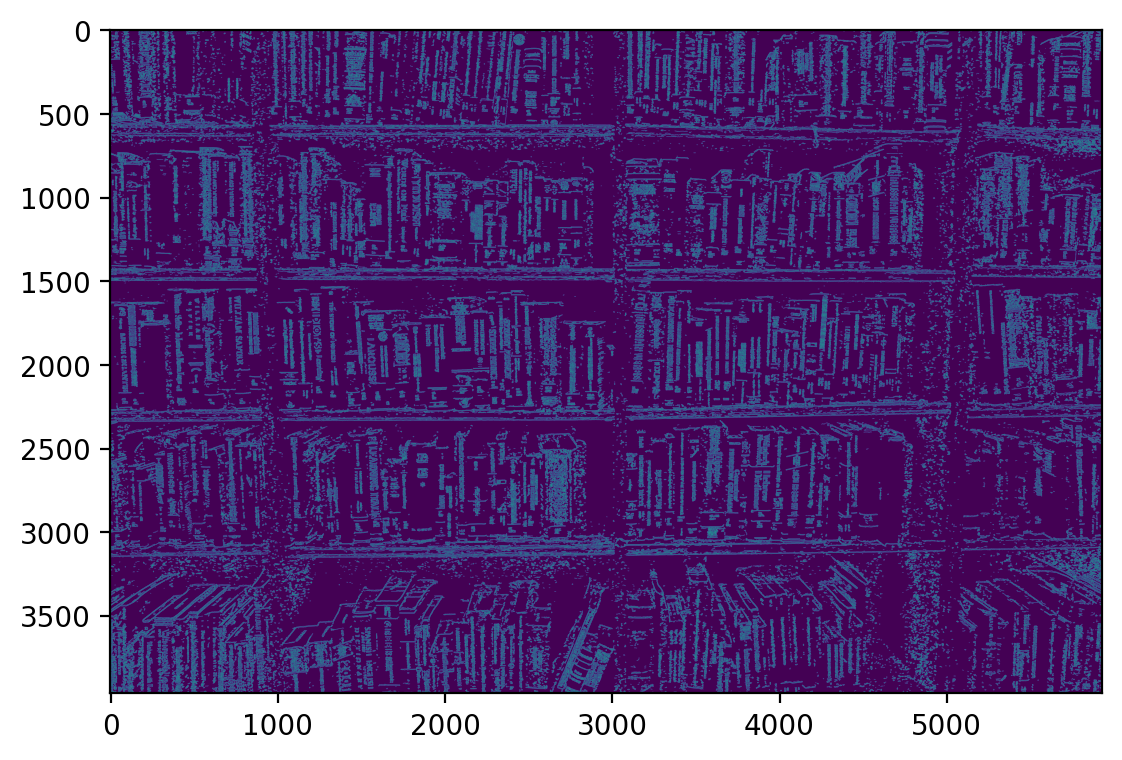

In [4]:
bookshelf_gray = ski.color.rgb2gray(bookshelf)
bookshelf_gray = ski.exposure.equalize_adapthist(bookshelf_gray)
bookshelf_gray = ski.filters.sobel_h(bookshelf_gray)
bookshelf_gray = ski.feature.canny(bookshelf_gray, sigma=1)
plt.imshow(bookshelf_gray)
plt.show()

In [5]:
tested_angles = np.linspace(np.pi * 5 / 4, np.pi * 7 / 4, 91, endpoint=True)
hspace, angles, distances = ski.transform.hough_line(
    bookshelf_gray, theta=tested_angles
)

Number of top lines: 4


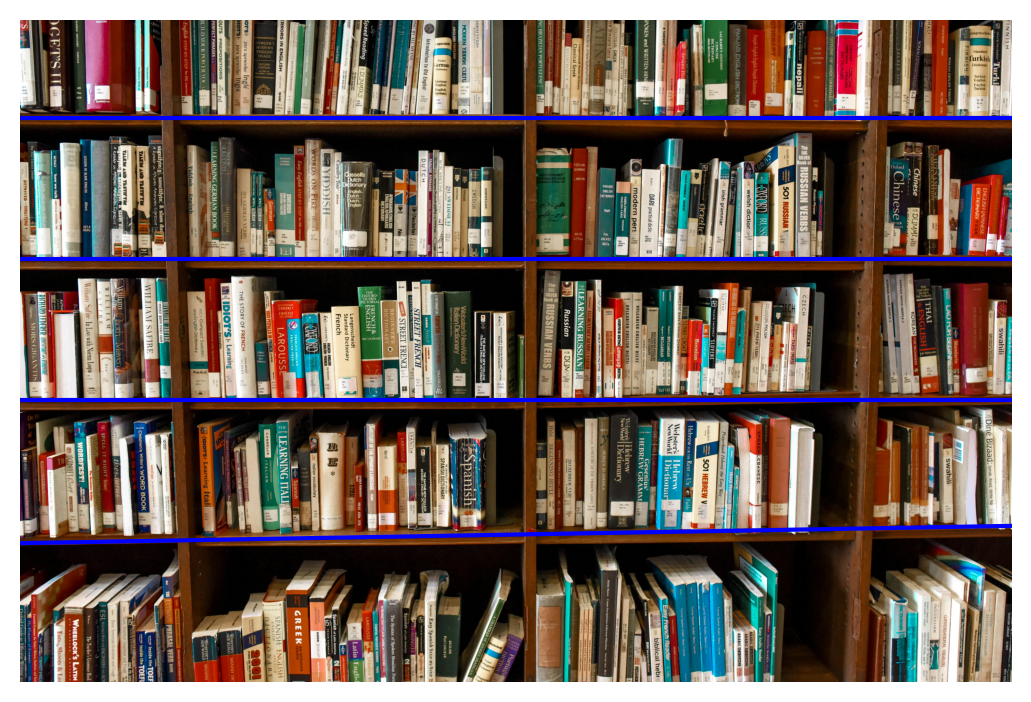

In [6]:
_, ax = plt.subplots()
top_lines = ski.transform.hough_line_peaks(hspace, angles, distances, min_distance=100)
print(f"Number of top lines: {len(top_lines[0])}")
for _, theta, r in zip(*top_lines):
    x, y = r * np.array([np.cos(theta), np.sin(theta)])
    m = np.tan(theta + np.pi / 2)
    # print(f"y: {y:0.1f}   slope: {m:0.2f}")
    ax.axline((x, y), slope=m, color="blue", lw=1.5)
ax.set_axis_off()
ax.imshow(bookshelf)
plt.show()

In [7]:
def bookshelf_detection(img_file: str) -> None:
    bookshelf = ski.io.imread(img_file)
    print(bookshelf.shape)

    bookshelf_gray = ski.color.rgb2gray(bookshelf)
    bookshelf_gray = ski.exposure.equalize_adapthist(bookshelf_gray)
    bookshelf_gray = ski.filters.sobel_h(bookshelf_gray)
    bookshelf_gray = ski.feature.canny(bookshelf_gray, sigma=1)

    tested_angles = np.linspace(np.pi * 4 / 3, np.pi * 5 / 3, 91, endpoint=True)
    hspace, angles, distances = ski.transform.hough_line(
        bookshelf_gray, theta=tested_angles
    )

    _, ax = plt.subplots()
    top_lines = ski.transform.hough_line_peaks(
        hspace, angles, distances, min_distance=100
    )
    print(f"Number of top lines: {len(top_lines[0])}")
    for _, theta, r in zip(*top_lines):
        x, y = r * np.array([np.cos(theta), np.sin(theta)])
        m = np.tan(theta + np.pi / 2)
        # print(f"y: {y:0.1f}   slope: {m:0.2f}")
        ax.axline((x, y), slope=m, color="red", lw=0.7)
    ax.set_axis_off()
    ax.imshow(bookshelf)
    plt.show()

(3959, 5931, 3)
Number of top lines: 4


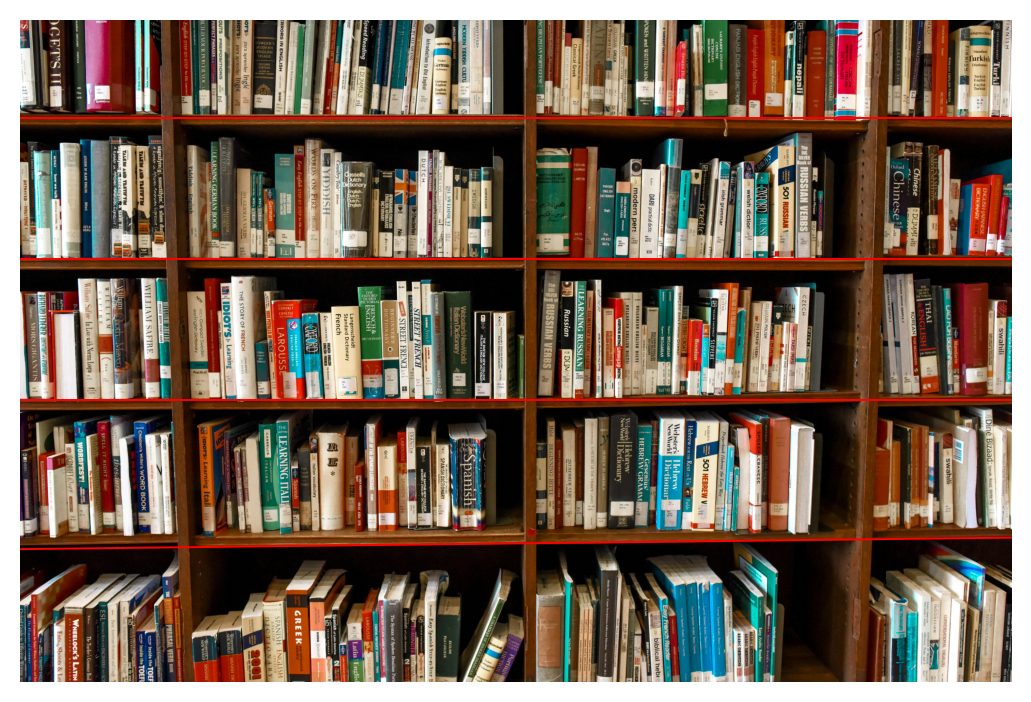

(1050, 1260, 3)
Number of top lines: 3


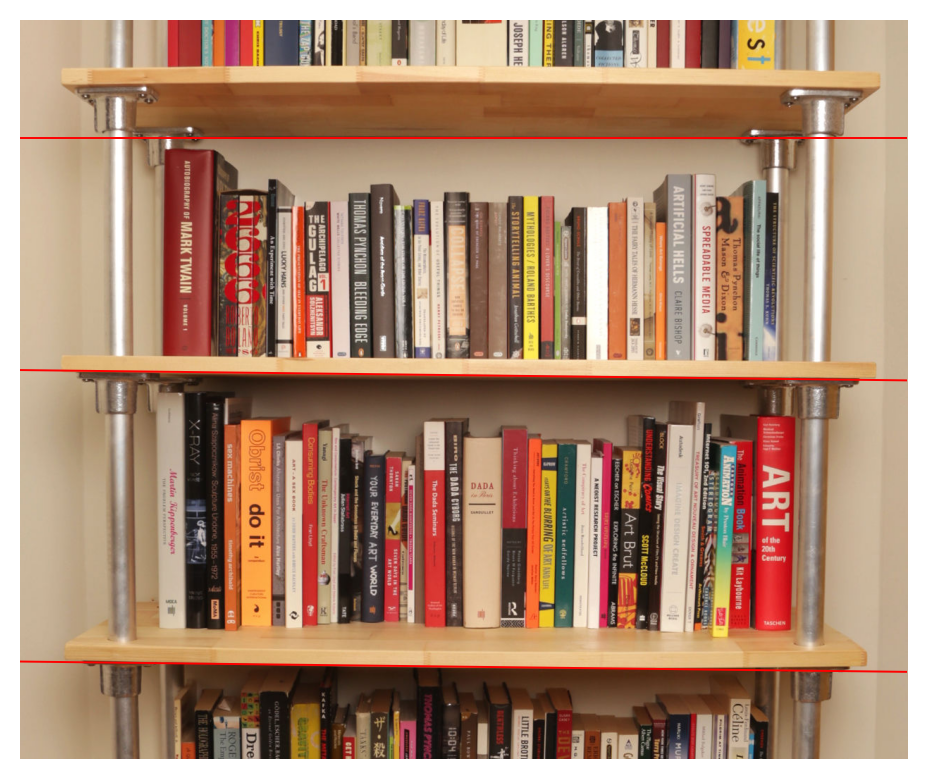

(1500, 1000, 3)
Number of top lines: 8


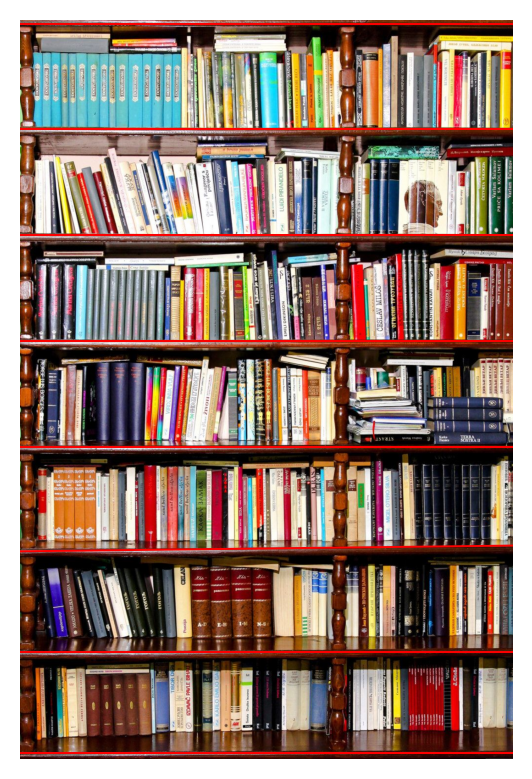

In [8]:
for i in range(1, 4):
    bookshelf_detection(f"../images/bookshelf{i}.jpg")
    # break

The Progressive Probabilistic Hough Transform is a similar method that finds the start and end points of lines.

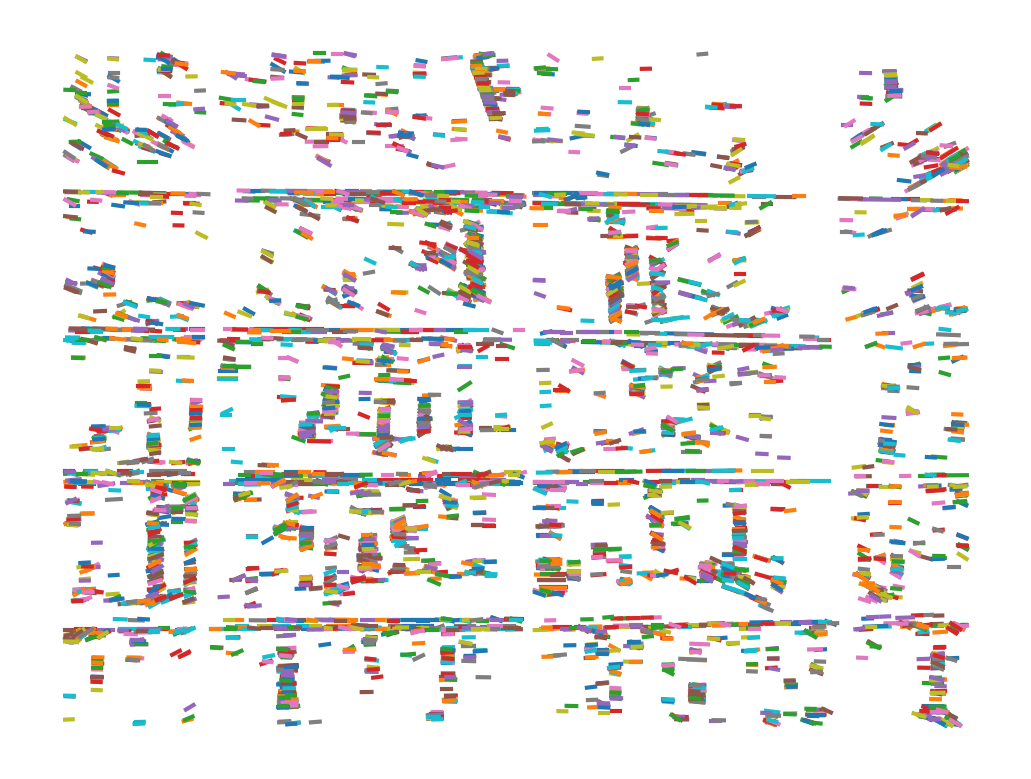

In [9]:
bookshelf = ski.io.imread("../images/bookshelf1.jpg")
bookshelf_gray = ski.color.rgb2gray(bookshelf)
edges = ski.feature.canny(ski.filters.sobel_h(bookshelf_gray))
lines = ski.transform.probabilistic_hough_line(
    edges, theta=np.linspace(np.pi * 4 / 3, np.pi * 5 / 3, 91, endpoint=True)
)

fig, ax = plt.subplots()
for p0, p1 in lines:
    ax.plot((p0[0], p1[0]), (p0[1], p1[1]))
# ax.imshow(bookshelf)
ax.set_axis_off()
plt.show()